## 1. Computing Sentence Embeddings

In [ ]:
import csv
import seaborn as sns
from scipy import spatial
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer

# Read attendees and their responses from a CSV file, replace attendees.csv with own link or file name
attendees_map = {}
with open('data.csv', newline='') as csvfile:
    attendees = csv.reader(csvfile, delimiter=',', quotechar='"')
    next(attendees)  # Skip the header row
    for row in attendees:
        name, paragraph = row
        attendees_map[paragraph] = name

# Generate sentence embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
paragraphs = list(attendees_map.keys())
embeddings = model.encode(paragraphs)

# Create a dictionary to store embeddings for each person
person_embeddings = {attendees_map[paragraph]: embedding for paragraph, embedding in zip(paragraphs, embeddings)}

In [ ]:
l = list(person_embeddings.values())
print(person_embeddings)

for i in person_embeddings.keys():
    print(len(person_embeddings[i]))

## 2. Visualization in 4 dimensions
The 4th dimension uses colour as a reference scale

In [ ]:
# Reducing dimensionality of embedding data, scaling to coordinate domain/range
import umap.umap_ as umap

reducer = umap.UMAP(n_components=4)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(list(person_embeddings.values()))
reduced_data = reducer.fit_transform(scaled_data)

In [ ]:
print(reduced_data)

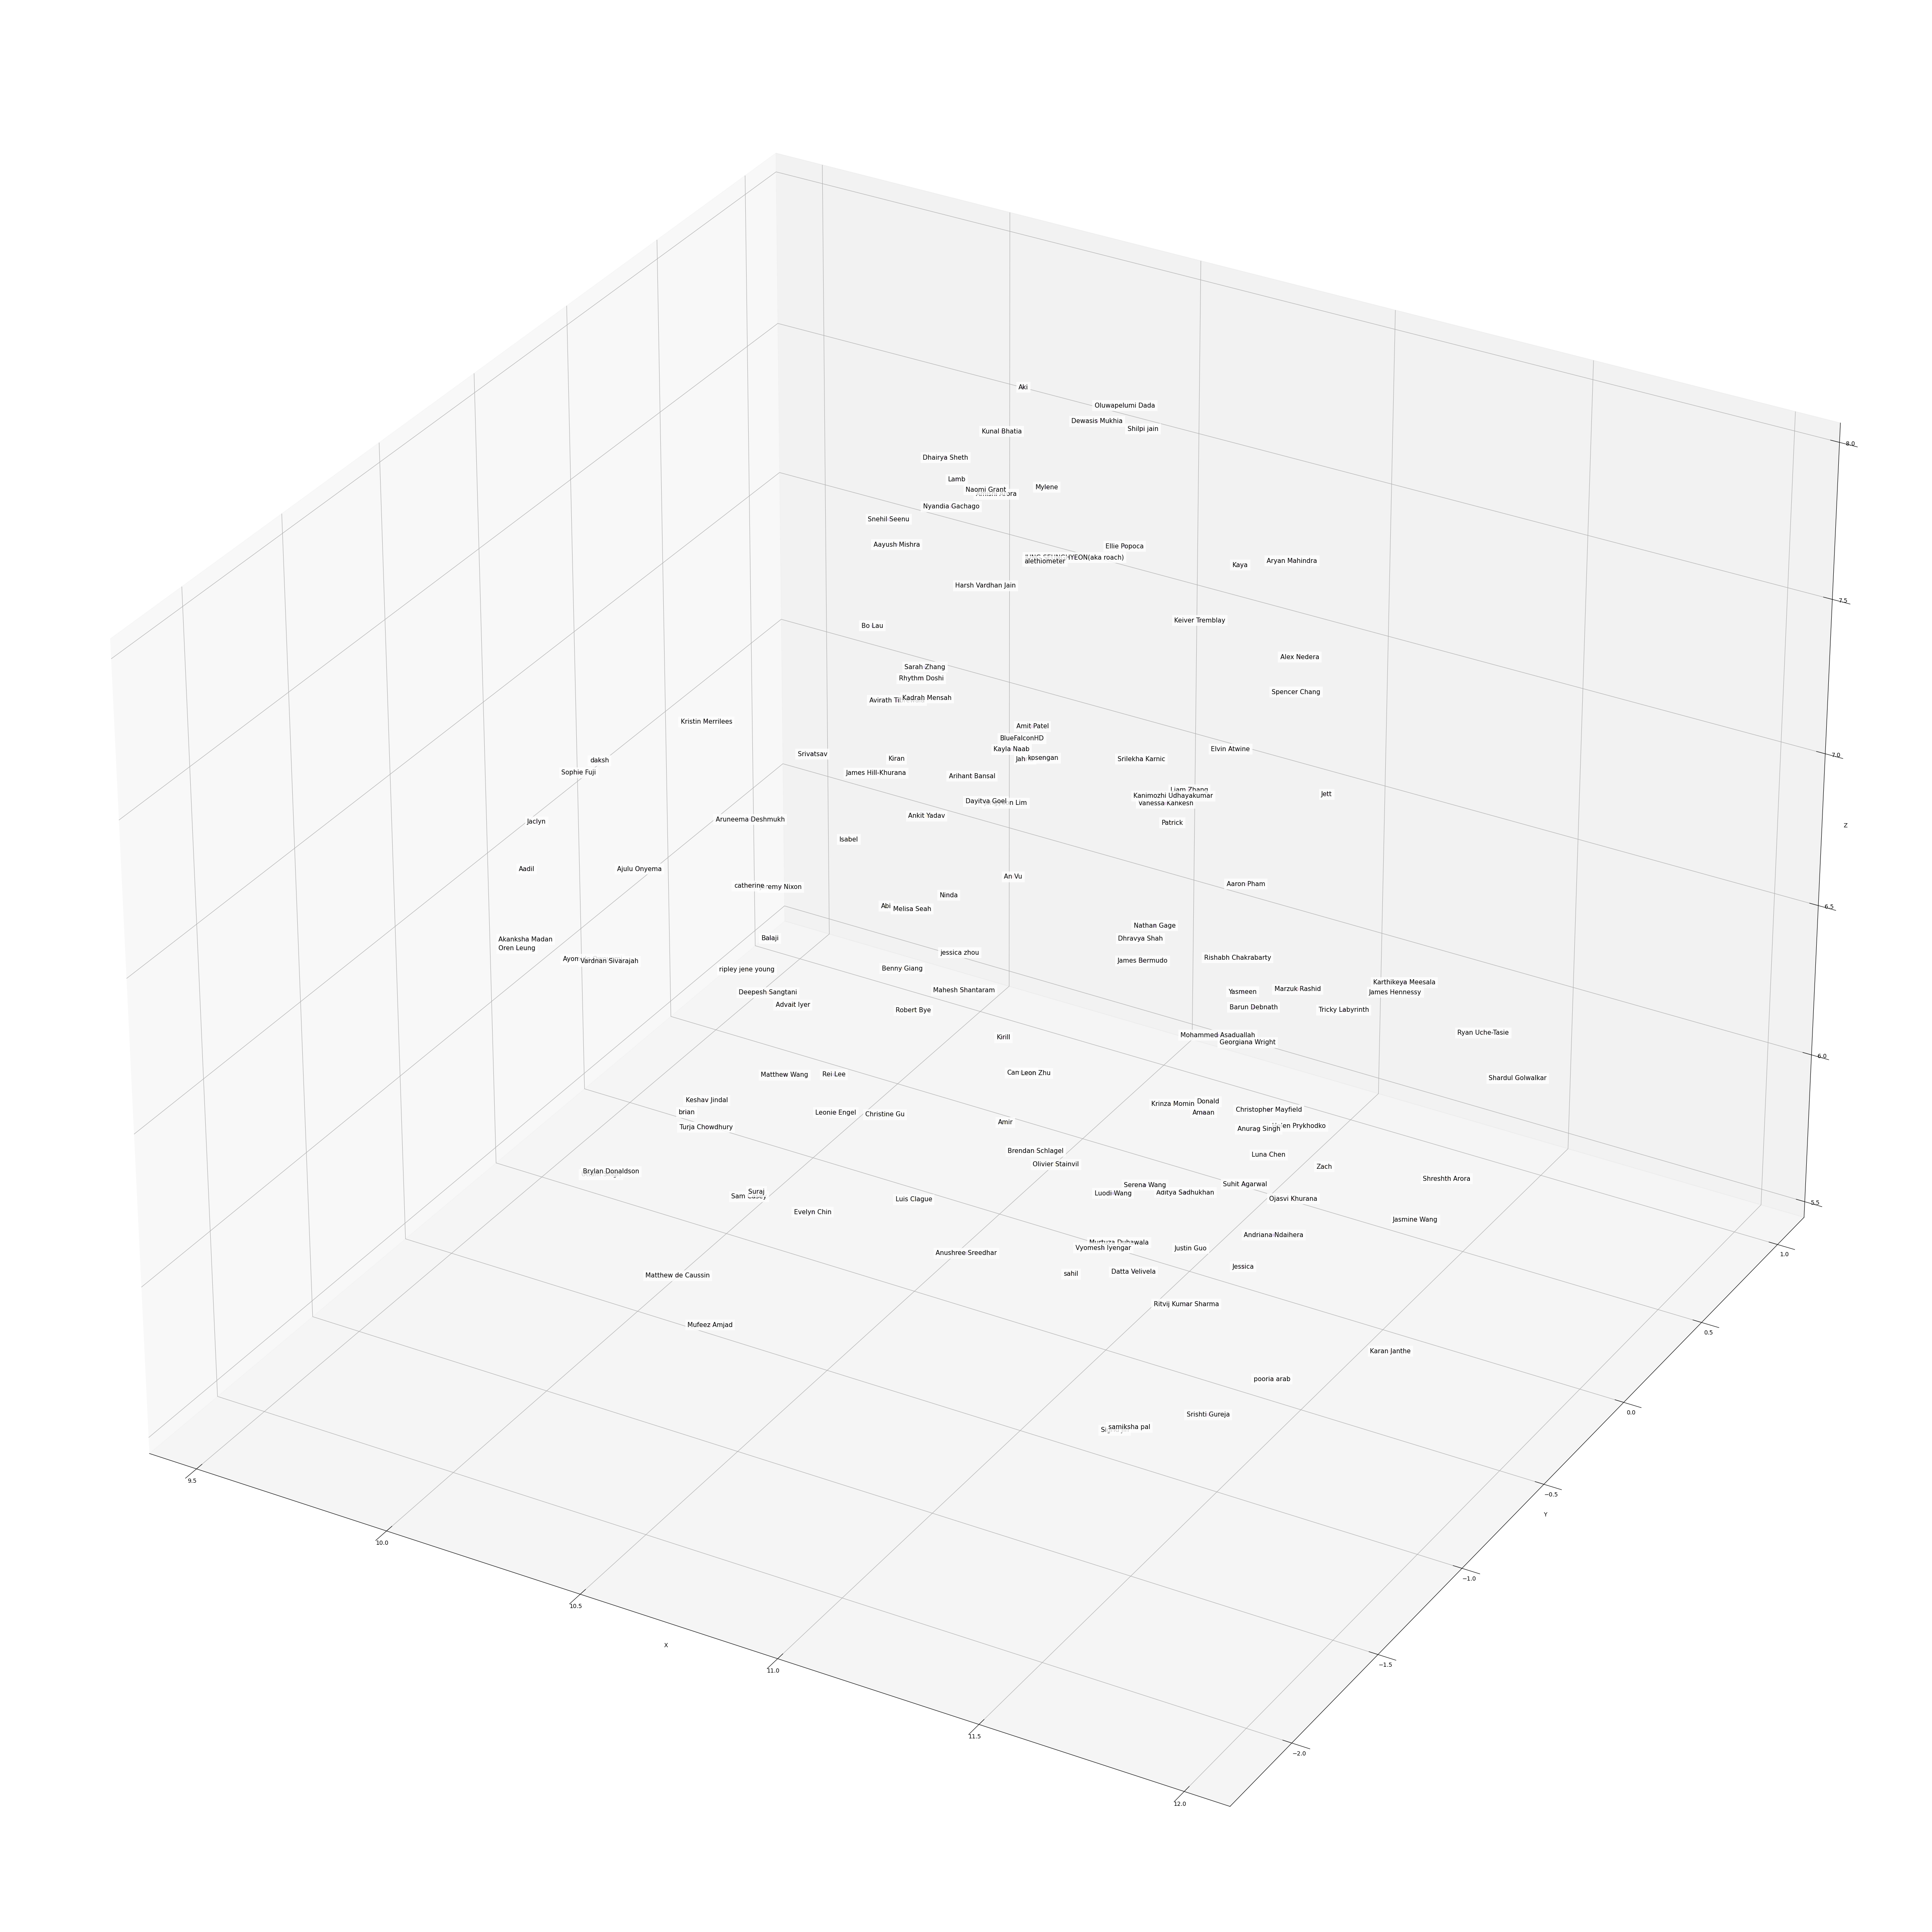

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have a 4D data array named `reduced_data` with shape (n, 4)
x = [row[0] for row in reduced_data]
y = [row[1] for row in reduced_data]
z = [row[2] for row in reduced_data]
c = [row[3] for row in reduced_data]  # Fourth dimension data
label = list(person_embeddings.keys())

fig = plt.figure(figsize=(60, 60))
ax = fig.add_subplot(111, projection='3d')

# Scale the axes
ax.set_xlim3d(min(x), max(x))
ax.set_ylim3d(min(y), max(y))
ax.set_zlim3d(min(z), max(z))

# Adjust the scaling factor
scale_factor = 2

# Plotting data points
sc = ax.scatter(x, y, z, c=c, cmap='plasma')

# Annotating data points with text labels
for i, name in enumerate(label):
    ax.text(x[i], y[i], z[i], name, fontsize=11, color='black', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Clean-up and Export
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.savefig('visualization.png', dpi=1000)
plt.show()